In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [460]:
trade = pd.read_csv("cashewprep.csv")#Initial Data
trade['Quantity'] = trade['Quantity']/1000 #Convert "Quantity" from KG to MT
exports = trade.loc[trade['Flow'] == 'Export'] #Separate Exports
exports = exports.loc[exports['Country or Area'] != 'India']#Exclude India
exports = exports.loc[exports['Country or Area'] != 'Viet Nam']#Exclude Viet Nam
exports = exports.loc[exports['Country or Area'] != 'Brazil']#Exclude Brazil
exp_by_year = exports.groupby(exports['Year'])['Quantity'].sum()#Group by year and sum exports
#print(exports)
'''
Where as with exports we needed to exclude the three exporters of kernel\n
with imports, we need to isolate Brazil, India and Viet Nam.
'''
imports = trade.loc[trade['Flow'] == 'Import'] #Separate Imports
ind = imports.loc[imports['Country or Area'] == 'India'] #India
viet = imports.loc[imports['Country or Area'] == 'Viet Nam']#Viet Nam
brz = imports.loc[imports['Country or Area'] == 'Brazil']#Brazil
world_imp = pd.concat([brz, ind, viet]) #Merge the three countries to 1 DF
imp_by_year = world_imp.groupby(world_imp['Year'])['Quantity'].sum()#Group by year sum imports
#print(imports)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


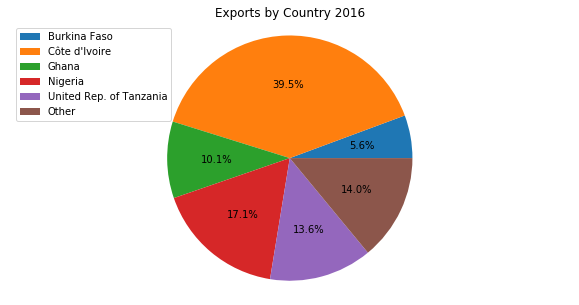

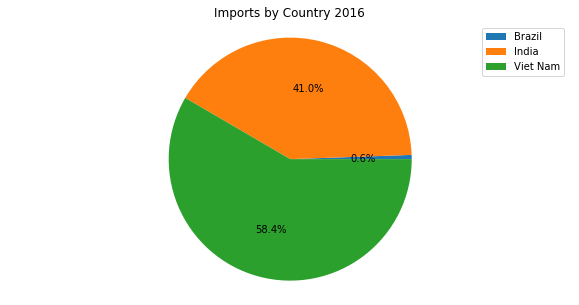

Looks like Cote DIvoire is the top exporter for 2016
Has is it always been that way?


In [461]:
#See who the major players are
recent = exports.loc[exports['Year'] == 2016]#Snapshot 2016
recenti = imports.loc[imports['Year'] == 2016]
#Generate a DataFrame for a pie chart
pie1 = pd.DataFrame()
pie1['labels'] = recent['Country or Area']
pie1['quantity'] = recent['Quantity']
pie1['pctofw'] = recent['Quantity']/sum(recent['Quantity'])
#print(pie1) # Too many entries for a clean pie chart
#Separate those who export at least 5% of world exports
pie2 = pie1.loc[pie1['pctofw'] >= .05] #the others
pie3 = pie1.loc[pie1['pctofw'] <= .05]
#add a new entry for "Other" to the original DF.
pie2.loc['6'] = ['Other', sum(pie3['quantity']), sum(pie3['pctofw'])]

#Generate pie chart for the exporters
labelex = pie2['labels']
plt.figure(figsize=(10, 5))
plt.pie(pie2.quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Exports by Country 2016')
plt.legend(labelex)
plt.show()

#For the Importers
labeli = recenti['Country or Area']
plt.figure(figsize=(10, 5))
plt.pie(recenti.Quantity, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Imports by Country 2016')
plt.legend(labeli)
plt.show()


print("Looks like Cote DIvoire is the top exporter for 2016")
print('Has is it always been that way?')


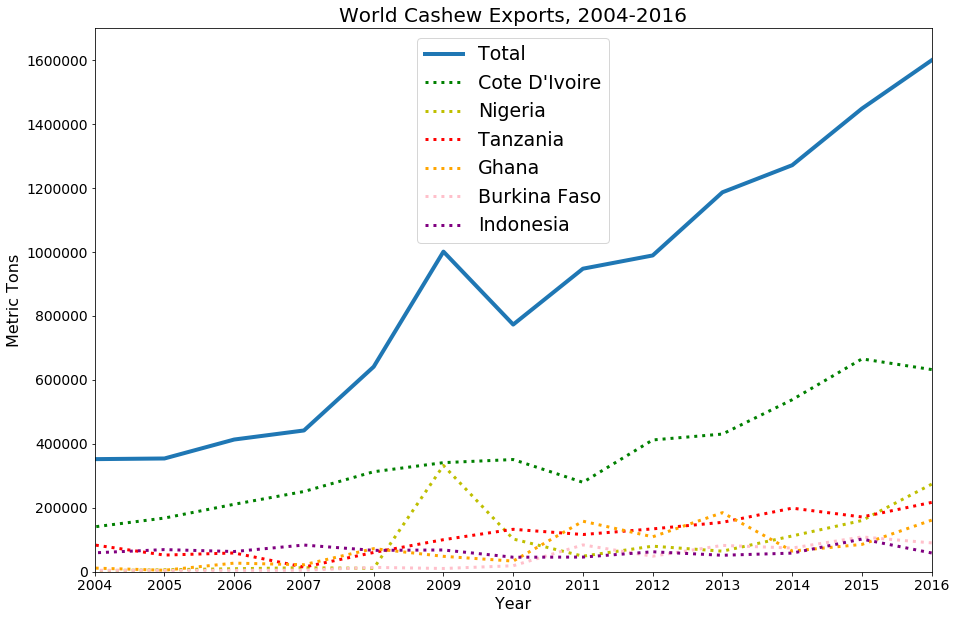

In [462]:
'''
Charting Countries vs World Production. From the information we got earlier\n
we know we should isolate , Cote Divoire, Tanzania, Nigeria, Burkina Faso\n
and Ghana. I am going to include Indonesia as well. India, Brazil and Viet Nam 
'''
#Exporters
#Isolate the countries
ivc = exports.loc[exports['Country or Area'] == "Côte d'Ivoire"]
ngr = exports.loc[exports['Country or Area'] == 'Nigeria']
tzn = exports.loc[exports['Country or Area'] == 'United Rep. of Tanzania']
gha = exports.loc[exports['Country or Area'] == 'Ghana']
bkf = exports.loc[exports['Country or Area'] == 'Burkina Faso']
indo = exports.loc[exports['Country or Area'] == 'Indonesia']
world_exp = pd.concat([ivc, ngr, tzn, gha, bkf, indo])
#print(world_exp)
plt.figure(figsize=(15,10))
plt.plot(exp_by_year, label='Total', linewidth=4)
plt.plot(ivc['Year'], ivc['Quantity'], label="Cote D'Ivoire", color='g', linestyle='dotted', linewidth=3)
plt.plot(ngr['Year'], ngr['Quantity'], label='Nigeria', color='y', linestyle='dotted', linewidth=3)
plt.plot(tzn['Year'], tzn['Quantity'], label='Tanzania', color='r', linestyle='dotted', linewidth=3)
plt.plot(gha['Year'], gha['Quantity'], label='Ghana', color='orange', linestyle='dotted', linewidth=3)
plt.plot(bkf['Year'], bkf['Quantity'], label='Burkina Faso', color='pink', linestyle='dotted', linewidth=3)
plt.plot(indo['Year'], indo['Quantity'], label='Indonesia', color='purple', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 1700000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,1700000)
#plt.xlim(1998,2016) is the whole range
plt.xlim(2004,2016)
plt.title('World Cashew Exports, 2004-2016', fontsize=20)

plt.show()



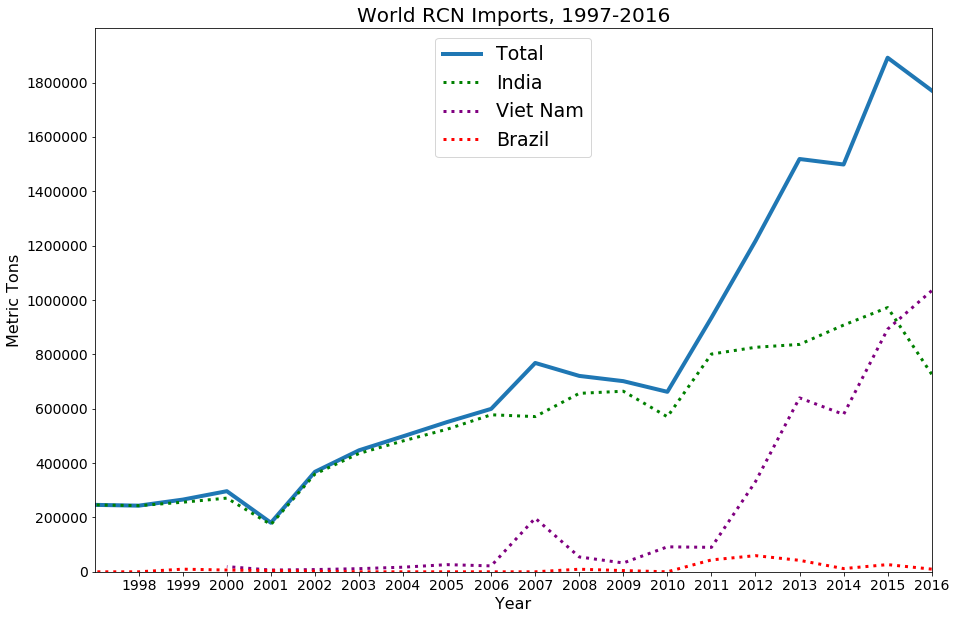

In [463]:
#For the importers
plt.figure(figsize=(15,10))
plt.plot(imp_by_year, label='Total', linewidth=4)
plt.plot(ind['Year'], ind['Quantity'], label='India', color='green', linestyle='dotted', linewidth=3)
plt.plot(viet['Year'], viet['Quantity'], label='Viet Nam', color='purple', linestyle='dotted', linewidth=3)
plt.plot(brz['Year'], brz['Quantity'], label='Brazil', color='red', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 2000000, 200000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,2000000)
#plt.xlim(1997,2016) is the whole range
plt.xlim(1997,2016)
plt.title('World RCN Imports, 1997-2016', fontsize=20)

plt.show()

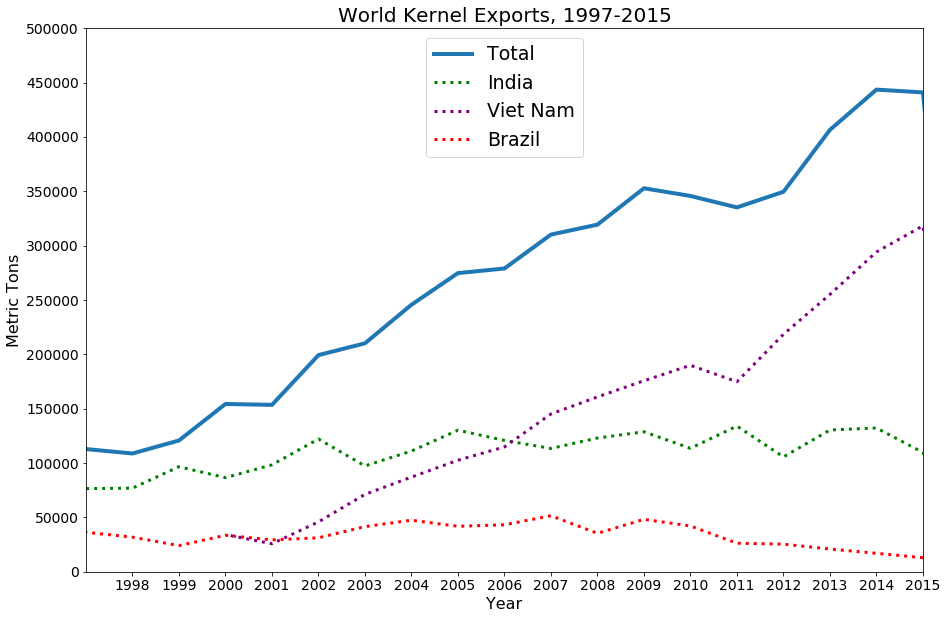

In [464]:
#World cashew kernel exports
kexports = trade.loc[trade['Flow'] == 'Export'] #Separate Export
indk = kexports.loc[kexports['Country or Area'] == 'India'] #India
vietk = kexports.loc[kexports['Country or Area'] == 'Viet Nam']#Viet Nam
brzk = kexports.loc[kexports['Country or Area'] == 'Brazil']#Brazil
kexp = [brzk, indk, vietk] #List of data by country
kexporters = pd.concat(kexp) #Merge the three countries to 1 DF
k_by_year = kexporters.groupby(kexporters['Year'])['Quantity'].sum()
#print(vietk)
#Generate the plot
plt.figure(figsize=(15,10))
plt.plot(k_by_year, label='Total', linewidth=4)
plt.plot(indk['Year'], indk['Quantity'], label='India', color='green', linestyle='dotted', linewidth=3)
plt.plot(vietk['Year'], vietk['Quantity'], label='Viet Nam', color='purple', linestyle='dotted', linewidth=3)
plt.plot(brzk['Year'], brzk['Quantity'], label='Brazil', color='red', linestyle='dotted', linewidth=3)
plt.legend(loc=9, fontsize=19)
plt.xlabel('Year', fontsize=16)
plt.xticks(range(1998, 2017, 1),fontsize=14)
plt.yticks(range(0, 2000000, 50000), fontsize=14)
plt.ylabel('Metric Tons', fontsize=16)
plt.ylim(0,500000)
#plt.xlim(1997,2016) is the whole range
plt.xlim(1997,2015) #Adjust for inacurrate 2016 data
plt.title('World Kernel Exports, 1997-2015', fontsize=20)

plt.show()

In [465]:
'''
We want to look at the average price it costs processors to import these nuts by year. 
Then we want to look at the average price they sell it for. There are some assumptions being made.

'''
years = list((range(2001,2016))) #For indexing purposes
years.reverse()
#Look at India as an example for 'ind' and 'indk'

#to derive the price/MT, we take the quantity divided by the value...a little data manipulation to be accurate
kernel_price_ind = list(indk['Trade (USD)']/indk['Quantity'])
rcn_price_ind = list(ind['Trade (USD)']/ind['Quantity'])
#The export value in (USD) of year 'n' should be compared against import value in (USD) of year n-1.
kpi = kernel_price_ind[1:16]
rpi = rcn_price_ind[2:17]
#New DF for accurate value comparisons
indprices = pd.DataFrame()
indprices['Year'] = years
#prices['Export'] = indk['Trade (USD)']/indk['Quantity'] #I'm not sure why this returns NaN in the column
indprices['Import'] = rpi
indprices['Export'] = kpi
indprices['Margin'] = indprices['Export'] - indprices['Import'] #Caluculate the value added or margin
#print(indprices)
#do the same for the other exporters


In [466]:
#Viet Nam
kernel_price_viet = list(vietk['Trade (USD)']/vietk['Quantity'])
rcn_price_viet = list(viet['Trade (USD)']/viet['Quantity'])
kpv = kernel_price_viet[1:16]
rpv = rcn_price_viet[2:17]
vprices = pd.DataFrame()
vprices['Year'] = years
vprices['Import'] = rpv
vprices['Export'] = kpv
vprices['Margin'] = vprices['Export'] - vprices['Import'] #Caluculate the value added or margin
#print(vprices)

In [467]:
#Brazil
kernel_price_brz = list(brzk['Trade (USD)']/brzk['Quantity'])
rcn_price_brz = list(brz['Trade (USD)']/brz['Quantity'])
kpb = kernel_price_brz[1:16]
rpb = rcn_price_brz[1:16]
bprices = pd.DataFrame()
bprices['Year'] = years
bprices['Import'] = rpb
bprices['Export'] = kpb
bprices['Margin'] = bprices['Export'] - bprices['Import']
#print(bprices)

    Year       Import       Export       Margin
0   2015  1274.723719  7429.630705  6154.906986
1   2014  1651.157790  6676.750061  5025.592270
2   2013   967.569823  7067.167928  6099.598106
3   2012   986.451825  7284.124013  6297.672188
4   2011  1069.967936  6672.834945  5602.867009
5   2010   967.966503  4964.374341  3996.407838
6   2009   679.995278  4483.377447  3803.382169
7   2008   728.306735  5428.975378  4700.668644
8   2007   613.921468  4719.602624  4105.681156
9   2006   596.354208  4503.200913  3906.846705
10  2005   738.022444  4746.303166  4008.280721
11  2004   698.554330  4427.206095  3728.651765
12  2003   574.596656  3609.252954  3034.656298
13  2002   565.627422  3460.894007  2895.266585
14  2001   533.850767  4076.493002  3542.642235


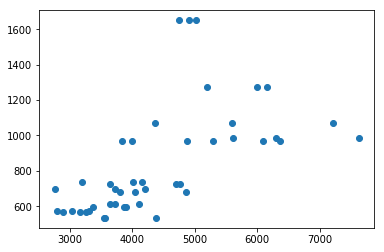

In [483]:
margins = pd.concat([indprices, vprices, bprices])
profits = margins['Margin']
#print(margins)
plt.scatter(profits, margins['Import'])
print(indprices)


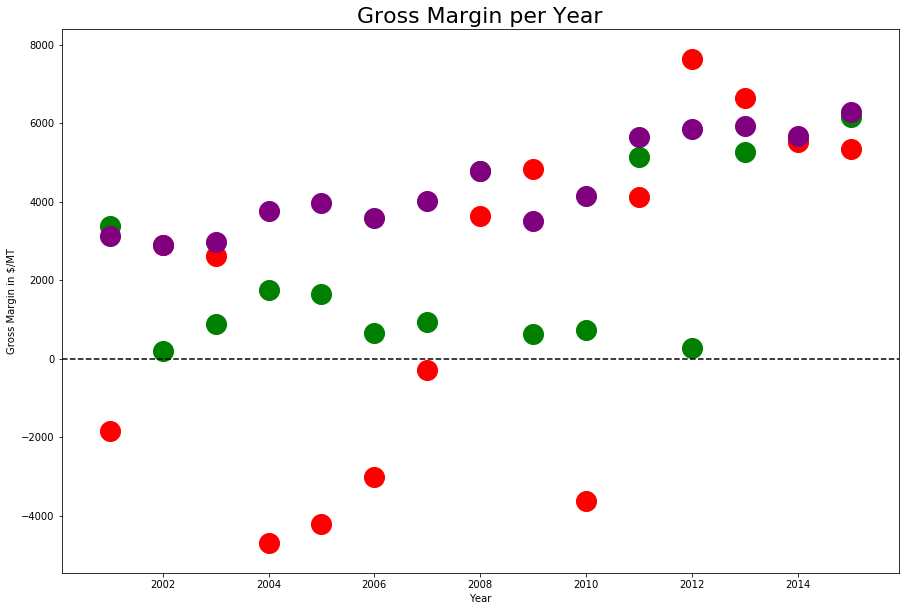

In [469]:
plt.figure(figsize=(15,10))
plt.scatter(
    x=vprices['Year'],
    y=vprices['Margin'],
    color='green', s=400)
plt.scatter(
    x=bprices['Year'],
    y=bprices['Margin'],
    color='red', s=400)
plt.scatter(
    x=indprices['Year'],
    y=indprices['Margin'],
    color='purple', s=400)
plt.axhline(0, color='black', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Gross Margin in $/MT')
plt.title("Gross Margin per Year", fontsize=22)
plt.show()


(array([ 3.,  1.,  1.,  2.,  6.,  3.,  9.,  8., 10.,  2.]),
 array([-4696.32925738, -3462.60683948, -2228.88442157,  -995.16200367,
          238.56041424,  1472.28283214,  2706.00525005,  3939.72766795,
         5173.45008585,  6407.17250376,  7640.89492166]),
 <a list of 10 Patch objects>)

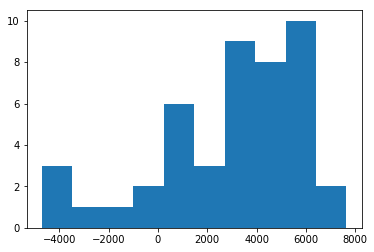

In [478]:
plt.hist(profits)

In [517]:
'''
India was the only country that showed consistent gains from Trade. Viet Nam and Brazil showed eratic 
patterns in the margin. In an attempt to normalize these measures,I will look at export prices form different 
origins. This changes the calculation for the margin, instead of "Kernel Export Price"-"RCN Import Price" to 
"Kernel Export Price"-"Market price of RCN"
'''
ivc['Price'] = ivc['Trade (USD)']/ivc['Quantity']
tzn['Price'] = tzn['Trade (USD)']/tzn['Quantity']
indo['Price'] = indo['Trade (USD)']/indo['Quantity']
mkt_exp_price = pd.concat([ivc, tzn, indo])#DF with selected countries
#mkt_exp_price[['Price']].groupby(mkt_exp_price['Year']).describe() #to look at the data
#mkt_exp_price[['Price']].groupby(mkt_exp_price['Country or Area']).describe() #
#print(mkt_exp_price)
#DF to calculate weight average price per year
avg_prices = pd.DataFrame()
avg_prices['Year'] = ivc['Year']
avg_prices['IVC'] = ivc['Trade (USD)'] #we just use trade because it == Price*Quantity
avg_prices['TZN'] = list(tzn['Trade (USD)'])#these return NaN in the DF if not converted
avg_prices['INDO'] = list(indo['Trade (USD)'])
avg_prices['IVCQ'] = ivc['Quantity']
avg_prices['TZNQ'] = list(tzn['Quantity'])
avg_prices['INDOQ'] = list(indo['Quantity'])
avg_prices['Agg_Val'] = avg_prices['IVC']+avg_prices['TZN']+avg_prices['INDO'] #SUM*PRODUCT
avg_prices['Agg_Quant'] = avg_prices['IVCQ']+avg_prices['TZNQ']+avg_prices['INDOQ'] #sum(quantity)
avg_prices['Avg_Price'] = avg_prices['Agg_Val']/avg_prices['Agg_Quant'] #SUM*PRODUCT/SUM(QUANTITY)
mkt_price = list(avg_prices['Avg_Price']) #convert to list to index in DF
adj_mkt_price = mkt_price[1:16] #adjust len() to conform to prior data
#reconstruct the margin data frame with updated market prices as import prices
indprices['Import']= adj_mkt_price
vprices['Import']= adj_mkt_price
bprices['Import']= adj_mkt_price
indprices['Margin'] = indprices['Export'] - indprices['Import']
vprices['Margin'] = vprices['Export'] - vprices['Import']
bprices['Margin'] = bprices['Export'] - bprices['Import']
margins = pd.concat([indprices, vprices, bprices])

avg_rev = pd.DataFrame()
avg_rev['Year'] = indprices['Year']
avg_rev['IND'] = indprices['Export']
avg_rev['BRZ'] = bprices['Export']
avg_rev['VIET'] = vprices['Export']
avg_rev['NRM AVG'] = (avg_rev['IND']+avg_rev['BRZ']+avg_rev['VIET'])/3
nrm_avg_exp = list(avg_rev['NRM AVG'])

avg_mar = pd.DataFrame()
avg_mar['Year'] = indprices['Year']
avg_mar['IND'] = indprices['Margin']
avg_mar['BRZ'] = bprices['Margin']
avg_mar['VIET'] = vprices['Margin']
avg_mar['NRM AVG'] = (avg_mar['IND']+avg_mar['BRZ']+avg_mar['VIET'])/3
nrm_avg_mar = list(avg_mar['NRM AVG'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

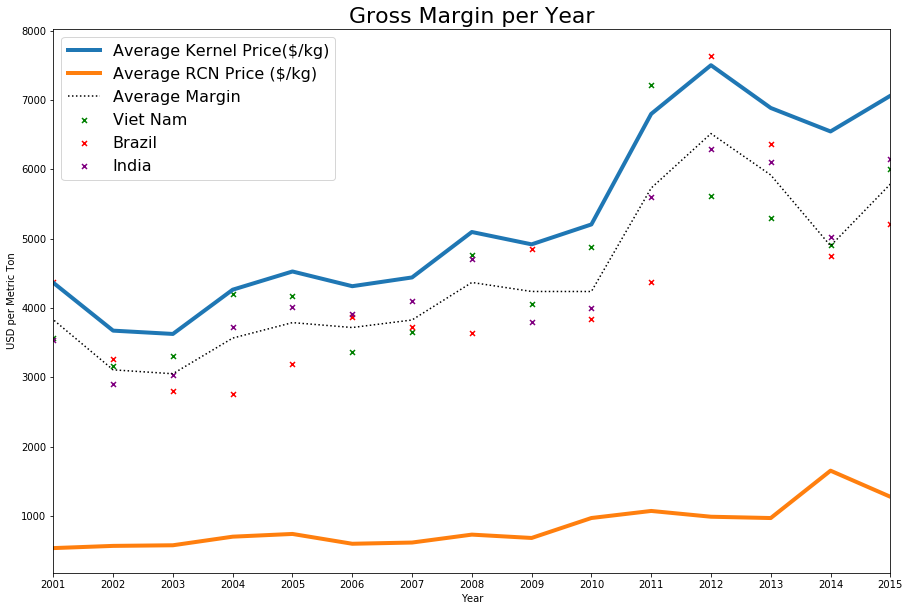

In [521]:
plt.figure(figsize=(15,10))
plt.plot(years, nrm_avg_exp, label='Average Kernel Price($/kg)', linewidth=4)
plt.plot(years, adj_mkt_price, label='Average RCN Price ($/kg)', linewidth=4)
plt.plot(years, nrm_avg_mar, label='Average Margin', color='black', linestyle='dotted')
plt.scatter(
    x=vprices['Year'],
    y=vprices['Margin'],
    color='green', marker='x',
    s=25, label='Viet Nam(Margin)')
plt.scatter(
    x=bprices['Year'],
    y=bprices['Margin'],
    color='red', marker='x',
    s=25, label='Brazil(Margin)'
    )
plt.scatter(
    x=indprices['Year'],
    y=indprices['Margin'],
    color='purple', marker='x',
    s=25, label='India')
plt.xlim(2001,2015)
plt.xticks(range(2001,2016, 1))
plt.xlabel('Year')
plt.ylabel('USD per Metric Ton')
plt.title("Gross Margin per Year", fontsize=22)
plt.legend(loc='upper left', fontsize=16)
plt.show()